# Actividad 1
## Representacion de Sistemas y controladores

Se desarrollara la resolucion de los ejercicios planteados utilizando Python.
Primero, vamos a importar librerias y paquetes a utilizar.
Se debe ejecutar el siguiente código en una celda de código:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import control as ct
from control.matlab import *
from IPython.display import Image
from scipy import signal
from math import log



### Circuito RLC

![Circuito RLC](images/circuit_RLC.png)




Sea el sistema eléctrico , con sus representacion en variables de estado : 

$\dot{x}=A x(t)+b u(t)$

$y=c^{T}x(t)$

Donde las matrices contienen a los coeficientes del circuito,

$ A =\begin{bmatrix}
 -R/L & -1/L \\ 
 1/C & 0 
\end{bmatrix}$

$ B = \begin{bmatrix}
1/L \\ 
0
\end{bmatrix} $

$ c^T =\begin{bmatrix}
 R & 0
\end{bmatrix} $

![](images/item1.png)

Para la simulacion se va a utilizar una entrada de 12V la cual cambia de signo cada 1ms

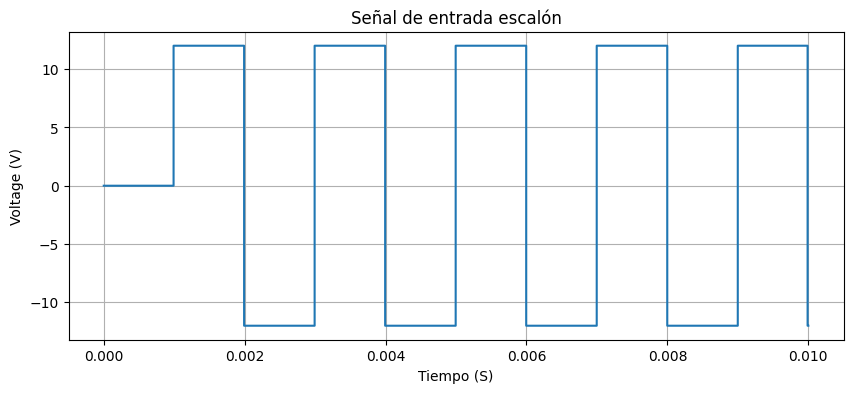

In [2]:

t_sim = 1000  # Duración de la simulación en ms
t = np.linspace(0, 0.01, t_sim)  # Arreglo de tiempo en ms
frecuencia = 500  # Frecuencia de la señal en Hz

delay = 0.001

# Generar señal cuadrada con fase ajustada para que empiece en 0 V en t=0
entrada = 12 * signal.square(2 * np.pi * frecuencia * t-np.pi, duty=0.5)

# Ajustar la señal para que esté en 0 V en t = 0 ms
entrada[0] = 0

entrada_delayed= np.where(t >= delay, entrada, 0)

# Visualizar la señal de entrada
plt.figure(figsize=(10, 4))
plt.plot(t, entrada_delayed, drawstyle='steps-pre')
plt.title('Señal de entrada escalón')
plt.xlabel('Tiempo (S)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

Estudiar dinamica del sistema, obteniendo la FDT y analizando sus polos.
Para determinar el paso o tiempo de integracion se busca el polo que corrsponde a la dinamica mas rápida para la cual se llega a un 95%. El paso de integración debe ser al menos 10 veces mas chico que el timepo calculado

Para determinar el tiempode simulacion se busca el polo que corresponde con la dinámica mas lenta para la cual se llega a un 5%

In [3]:

R=47
L=1e-6
C=100e-9

A=[[-R/L, -1/L], [1/C, 0]]
B=[[1/L], [0]]
C=[[R,0]] 
D=[[0]]                 

# Obtener la función de transferencia
tf = ct.minreal(ss2tf(A, B, C, D))

# Imprimir la función de transferencia
print(tf)

#Obtener polos de la función de transferencia
poles = ct.poles(tf)
print(poles)    

#Paso de integracion (h) -> Dinamica rapida (polo mas alejado eje imaginario)

pR = min(poles)
print("El polo más rápido es: {:e}".format(pR))

h=((log(0.95)/pR)/10)
print("El paso de integracion es:{:e}".format(h))

#Tiempo de simulacion (ts)

pL=max(poles) 
print("El polo más rápido es: {:e}".format(pL))

ts=((log(0.05)/pL)*5)
print("El tiempo de simulacion es :{:e}".format(ts))


0 states have been removed from the model
<TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


       4.7e+07 s
-----------------------
s^2 + 4.7e+07 s + 1e+13

[-46786262.04439004+0.j   -213737.95560996+0.j]
El polo más rápido es: -4.678626e+07+0.000000e+00j
El paso de integracion es:1.096332e-10-0.000000e+00j
El polo más rápido es: -2.137380e+05+0.000000e+00j
El tiempo de simulacion es :7.007956e-05+0.000000e+00j


En primer lugar simularemos con los siguientes valores:

- $ R = 47  \Omega $
- $ L = 1  \mu Hy $
- $ C = 100  nF $

Luego simulamos la respuesta del circuito


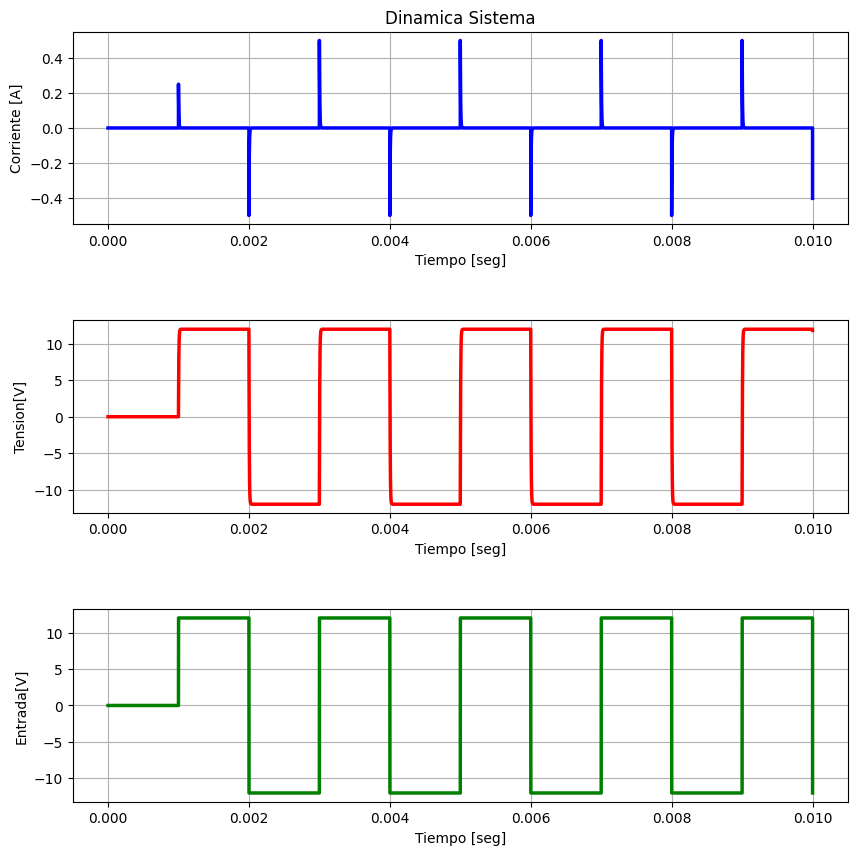

In [4]:
R=47
L=1e-6
C=100e-9

A=[[-R/L, -1/L], [1/C, 0]]
B=[[1/L], [0]]
C1=[[1, 0]] #Matriz para medir corriente
C2=[[0, 1]] #Matriz para medir voltage
D=[[0]]

sys1 = signal.StateSpace(A, B, C1, D) #voltaje capacitor
sys2 = signal.StateSpace(A, B, C2, D) #corrient

#------------------------------------------------#
t_sim = 100000 # Duración de la simulación en ms
t = np.linspace(0, 0.01, t_sim)  # Arreglo de tiempo en ms
frecuencia = 500  # Frecuencia de la señal en Hz

delay = 0.001

# Generar señal cuadrada con fase ajustada para que empiece en 0 V en t=0
entrada = 12 * signal.square(2 * np.pi * frecuencia * t-np.pi, duty=0.5)

# Ajustar la señal para que esté en 0 V en t = 0 ms
entrada[0] = 0

u= entrada_delayed= np.where(t >= delay, entrada, 0)

#------------------------------------------------#

# Simular la respuesta del sistema
t1,y1,x1= signal.lsim(sys1,u, t) # simular sistemas lineales e invariantes en el tiempo (LTI)
t2,y2,x2= signal.lsim(sys2,u, t) 

# Visualizar la salida del sistema
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(t1, y1, 'b-', linewidth=2.5,label='Corriente')
plt.grid()
plt.title('Dinamica Sistema')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Corriente [A]')

plt.subplots_adjust(hspace = 0.5)  # Ajustar el espacio entre los subplots


plt.subplot(3, 1, 2)
plt.plot(t2, y2, 'r-', linewidth=2.5, label='Tension')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Tension[V]')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, u, 'g-', linewidth=2.5, label='Entrada')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Entrada[V]')
plt.grid()

Tomando como ejemplo otros valores vistos en clases:

- $ R = 4.7 k\Omega $
- $ L = 10  \mu Hy $
- $ C = 100  nF $

Luego simulamos la respuesta del circuito


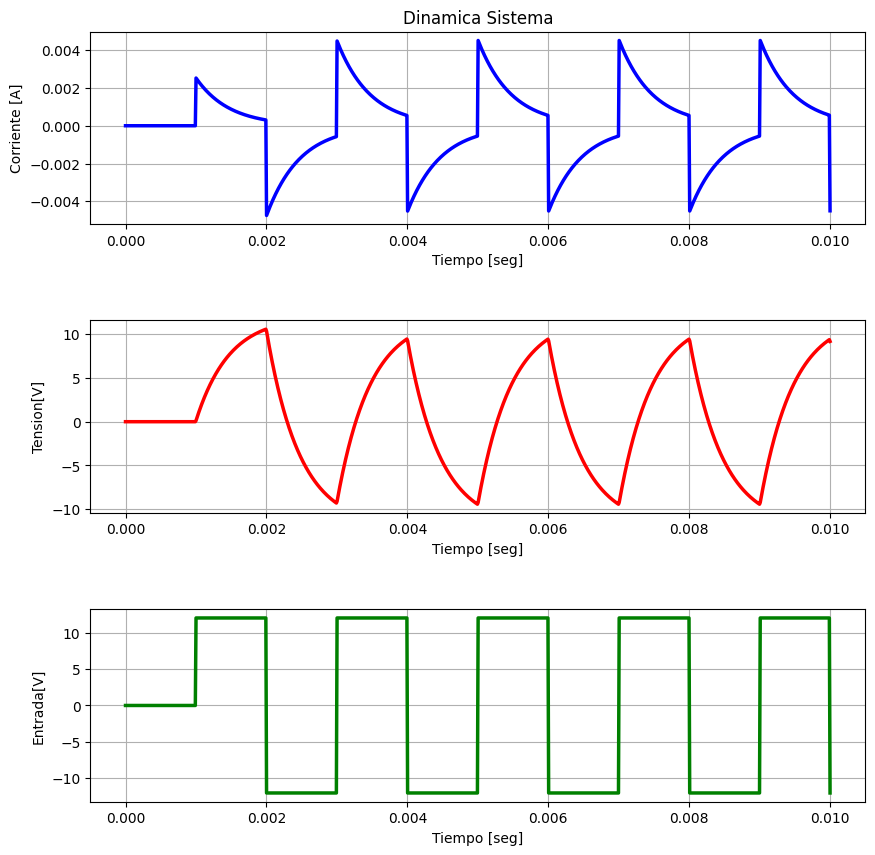

In [5]:
R=4.7e3
L=10e-6
C=100e-9

A=[[-R/L, -1/L], [1/C, 0]]
B=[[1/L], [0]]
C1=[[1, 0]] #Matriz para medir corriente
C2=[[0, 1]] #Matriz para medir voltage
D=[[0]]

sys1 = signal.StateSpace(A, B, C1, D) #voltaje capacitor
sys2 = signal.StateSpace(A, B, C2, D) #corrient

#------------------------------------------------#
t_sim = 1000 # Duración de la simulación en ms
t = np.linspace(0, 0.01, t_sim)  # Arreglo de tiempo en ms
frecuencia = 500  # Frecuencia de la señal en Hz

delay = 0.001

# Generar señal cuadrada con fase ajustada para que empiece en 0 V en t=0
entrada = 12 * signal.square(2 * np.pi * frecuencia * t-np.pi, duty=0.5)

# Ajustar la señal para que esté en 0 V en t = 0 ms
entrada[0] = 0

u= entrada_delayed= np.where(t >= delay, entrada, 0)

#------------------------------------------------#

# Simular la respuesta del sistema
t1,y1,x1= signal.lsim(sys1,u, t) # simular sistemas lineales e invariantes en el tiempo (LTI)
t2,y2,x2= signal.lsim(sys2,u, t) 

# Visualizar la salida del sistema
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(t1, y1, 'b-', linewidth=2.5,label='Corriente')
plt.grid()
plt.title('Dinamica Sistema')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Corriente [A]')

plt.subplots_adjust(hspace = 0.5)  # Ajustar el espacio entre los subplots


plt.subplot(3, 1, 2)
plt.plot(t2, y2, 'r-', linewidth=2.5, label='Tension')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Tension[V]')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, u, 'g-', linewidth=2.5, label='Entrada')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Entrada[V]')
plt.grid()








![](images/item2.png)

Basandonos en las variables de entrada y salida

$u(t)=V_e(t)$

$y(t)=V_c(t)$

Debemos tranformar en variables de estado